In [98]:
import numpy as np
import pandas as pd

# Q 6. Consider weather forecasting dataset

In [42]:
# reading weather.csv file
df = pd.read_csv('weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


#### (A) Compute mean of a series grouped by another series.

In [109]:
''' 
(A)
''' 

# computing mean of temp_max series grouped by weather series
df['temp_max'].groupby(df['weather']).mean()

weather
drizzle    15.926415
fog        16.757426
rain       13.454602
snow        5.573077
sun        19.861875
Name: temp_max, dtype: float64

#### (B) Fill an intermittent time series to replace all missing dates with values of previous non-missing date.

In [112]:
''' 
(B)
''' 
import random

# extract date column from the dataset
time_series = df['date']

# set some random values to nan
# for i in range(0,101):
#     row = random.randint(1,1416)
#     time_series[row] = np.nan

# count nan values in dataframe
print('Count of nan values before :: ',time_series.isna().sum())

# replace nan values by the forward fill method
time_series = time_series.replace(nan,method='ffill')

# count nan values in dataframe
print('Count of nan values after :: ',time_series.isna().sum())


Count of nan values before ::  98
Count of nan values after ::  0


#### (C) Perform appropriate year-month string to dates conversion.

In [44]:
''' 
(C)
''' 
from datetime import datetime

print('Data type of date :: ',df.date.dtype)

# func = lambda x : datetime.strptime(x,'%Y-%m-%d')
# df['date'] = df.date.apply(func)
df['date'] = pd.to_datetime(df.date)


print('Data type of date :: ',df.date.dtype)

Data type of date ::  object
Data type of date ::  datetime64[ns]


#### (D) Split a dataset to group by two columns and then sort the aggregated results within the groups.

In [47]:
''' 
(D)
'''
i=0
for key,data in df.groupby(['weather','precipitation']):       #group by data frame on weather and precipitaion column
    tmp_df = data.set_index(['weather','precipitation']).sort_values(by='date')   #sort aggregated results with in the groups
    display(key,tmp_df.head())
    i += 1
    if i==5:   #display only 5 groups
        break

('drizzle', 0.0)

date  temp_max  temp_min  wind
weather precipitation                                     
drizzle 0.0           2012-01-01      12.8       5.0   4.7
        0.0           2012-01-27       6.7      -2.2   1.4
        0.0           2012-02-15       7.2       0.6   1.8
        0.0           2012-03-26      12.8       6.1   4.3
        0.0           2012-04-13      15.0       3.9   4.0

('fog', 0.0)

date  temp_max  temp_min  wind
weather precipitation                                     
fog     0.0           2012-07-11      27.8      13.3   2.9
        0.0           2012-09-17      27.8      11.7   2.2
        0.0           2012-09-23      19.4      10.0   1.4
        0.0           2012-09-24      21.1      10.0   1.8
        0.0           2012-11-26       9.4       1.7   3.8

('rain', 0.0)

date  temp_max  temp_min  wind
weather precipitation                                     
rain    0.0           2012-01-07       7.2       2.8   2.3
        0.0           2012-01-23       8.3       1.1   3.6
        0.0           2012-01-28       6.7       0.6   2.2
        0.0           2012-02-25       7.2       2.8   6.4
        0.0           2012-03-04      10.6       6.7   5.6

('rain', 0.3)

date  temp_max  temp_min  wind
weather precipitation                                     
rain    0.3           2012-02-07      15.6       7.8   5.3
        0.3           2012-04-06      11.1       3.3   2.6
        0.3           2012-05-23      14.4       8.9   6.3
        0.3           2012-05-30      18.9      11.1   1.5
        0.3           2012-06-02      18.9      10.6   3.7

('rain', 0.5)

date  temp_max  temp_min  wind
weather precipitation                                     
rain    0.5           2012-04-12      13.9       5.6   2.6
        0.5           2012-05-01      11.7       6.1   6.4
        0.5           2012-05-02      13.3       5.6   2.5
        0.5           2012-06-25      19.4      11.1   3.1
        0.5           2012-07-13      23.3      13.9   2.2

#### (E) Split a given dataframe into groups with bin counts.

In [57]:
''' 
(E)
''' 

# split dataframe into groups with bin counts
groups = df.groupby(['weather',pd.cut(df.date,4)])
groups.size().unstack()

date,"(2011-12-30 12:57:36, 2012-12-31]","(2012-12-31, 2013-12-31]","(2013-12-31, 2014-12-31]","(2014-12-31, 2015-12-31]"
weather,,,,
drizzle,31,15,0,7
fog,5,16,28,52
rain,191,158,148,144
snow,21,3,2,0
sun,118,173,187,162


# Q 7. Consider a dataframe containing data about students i.e. name, gender and passing division.

#### creating dataframe

In [16]:
Name = ['Mudit Chauhan','Seema Chopra','Rani Gupta','Aditya Narayan','Sanjeev Sahni','Prakash Kumar','Rity Aggarwal','Akshay Goel','Meeeta Kulkarni','Preeti Ahuja','Sunil Das Gupta','Sonali Sapre','Rashmi Talwar','Ashish Dubey','Kiran Sharma','Sameer Bansal']
Birth_Month =['December','January','March','October','February','December','September','August','July','November','April','January','June','May','February','October']
Gender = ['M','F','F','M','M','M','F','M','F','F','M','F','F','M','F','M']
Pass_Division = ['III','II','I','I','II','III','I','I','II','II','III','I','III','II','II','I']

df = pd.DataFrame({'Name':Name,'Birth_Month':Birth_Month,'Gender':Gender,'Pass_Division':Pass_Division})
df

,Name,Birth_Month,Gender,Pass_Division
0,Mudit Chauhan,December,M,III
1,Seema Chopra,January,F,II
2,Rani Gupta,March,F,I
3,Aditya Narayan,October,M,I
4,Sanjeev Sahni,February,M,II
5,Prakash Kumar,December,M,III
6,Rity Aggarwal,September,F,I
7,Akshay Goel,August,M,I
8,Meeeta Kulkarni,July,F,II
9,Preeti Ahuja,November,F,II


#### (A) Perform one hot encoding of the last two columns of categorical data using the get_dummies() function.

In [17]:
''' 
(A)
''' 

# perform one hot encoding
df = pd.get_dummies(df,columns=['Gender','Pass_Division'])
df

,Name,Birth_Month,Gender_F,Gender_M,Pass_Division_I,Pass_Division_II,Pass_Division_III
0,Mudit Chauhan,December,0,1,0,0,1
1,Seema Chopra,January,1,0,0,1,0
2,Rani Gupta,March,1,0,1,0,0
3,Aditya Narayan,October,0,1,1,0,0
4,Sanjeev Sahni,February,0,1,0,1,0
5,Prakash Kumar,December,0,1,0,0,1
6,Rity Aggarwal,September,1,0,1,0,0
7,Akshay Goel,August,0,1,1,0,0
8,Meeeta Kulkarni,July,1,0,0,1,0
9,Preeti Ahuja,November,1,0,0,1,0


#### (B) Sort this data frame on the "Birth Month" column (i.e., January to December).

In [30]:
# create a dictionary to convert month into categorical
month_num = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
df.replace(month_num,inplace=True)   #replace month name with its corresponding categorical value in the dict
df.sort_values(by='Birth_Month')     #sort values on birth month

,Name,Birth_Month,Gender_F,Gender_M,Pass_Division_I,Pass_Division_II,Pass_Division_III
1,Seema Chopra,1,1,0,0,1,0
11,Sonali Sapre,1,1,0,1,0,0
4,Sanjeev Sahni,2,0,1,0,1,0
14,Kiran Sharma,2,1,0,0,1,0
2,Rani Gupta,3,1,0,1,0,0
10,Sunil Das Gupta,4,0,1,0,0,1
13,Ashish Dubey,5,0,1,0,1,0
12,Rashmi Talwar,6,1,0,0,0,1
8,Meeeta Kulkarni,7,1,0,0,1,0
7,Akshay Goel,8,0,1,1,0,0


# Question Paper

### Q 5. Consider the following DataFrame ADM containing data of freshly admitted students in a college during various rounds of admission. The DataFrame consits of the student's name,cut off list in which he/she has taken admission, date of admission, his/her% of marks, course code andd gender.

In [58]:
Sid = ['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10']
Name = ['Amit','Pradeep','Rinky','Sonia','Sushil','Neeraj','Preeti Sharma','Deep Gupta','Priya','Anand']
List = ['I','II','I','IV','III','II','IV','III','II','I']
DateAdm = ['01-07-2021','09-07-2021','04-07-2021','01-08-2021','20-07-2021','11-07-2021','03-08-2021','23-07-2021','10-07-2021','01-07-2021']
Marks = [97,95,90,96,96.5,94.5,89,95.75,93.5,88.5]
CourseCode = ['C001','C009','C112','C001','C001','C009','C112','C001','C009','C112']
Gender = ['M','M','F','F','M','M','F','M','F','M']

data = {'Sid':Sid,'Name':Name,'List':List,'DateAdm':DateAdm,'Marks':Marks,'Course Code':CourseCode,'Gender':Gender}
df = pd.DataFrame(data)
df

,Sid,Name,List,DateAdm,Marks,Course Code,Gender
0,S1,Amit,I,01-07-2021,97.00,C001,M
1,S2,Pradeep,II,09-07-2021,95.00,C009,M
2,S3,Rinky,I,04-07-2021,90.00,C112,F
3,S4,Sonia,IV,01-08-2021,96.00,C001,F
4,S5,Sushil,III,20-07-2021,96.50,C001,M
5,S6,Neeraj,II,11-07-2021,94.50,C009,M
6,S7,Preeti Sharma,IV,03-08-2021,89.00,C112,F
7,S8,Deep Gupta,III,23-07-2021,95.75,C001,M
8,S9,Priya,II,10-07-2021,93.50,C009,F
9,S10,Anand,I,01-07-2021,88.50,C112,M


#### (A) Set the first column 'Sid' as the row index of the given DataFrame ADM. Create a pivot table of the DataFrame to display the total number of admissions as per 'Course Code' and 'Gender'.

In [64]:
''' 
(A)
''' 

# df.set_index('Sid',inplace=True)
df.groupby(['Course Code','Gender'])['Name'].count()

Course Code  Gender
C001         F         1
             M         3
C009         F         1
             M         2
C112         F         2
             M         1
Name: Name, dtype: int64

#### (B) For each 'List', find the total number of admissions, minimum 'Marks%' and maximum 'Marks%' in each course.

In [73]:
''' 
(B)
''' 

df.groupby('List')['Marks'].agg([('No. of Adm','count'),('Max %','max'),('Min %','min')])

,No. of Adm,Max %,Min %
List,,,
I,3,97.0,88.50
II,3,95.0,93.50
III,2,96.5,95.75
IV,2,96.0,89.00


##### (C) Calculate and display the average 'Marks%' of all Female students of course 'C112'.

In [82]:
avg_prcnt = df[(df['Course Code'] == 'C112') & (df['Gender'] == 'F')]['Marks'].mean()
print('Average % marks of all Female students of course \'C112\' :: ',avg_prcnt)

Average % marks of all Female students of course 'C112' ::  89.5


# Q6.


##### (A) Give Pandas statements to create two data series of random floating-point numbers where the first data series has a datetime index of all second Tuesdays of every month of 2021 and the second data series has datetime index of 20 continuous dates ending at 31/01/2021.

In [109]:
''' 
(A)
'''

# generate date of second Tuesdays of every month of 2021
dates = pd.date_range('01/01/2021',periods=12,freq='WOM-2TUE')
# generate series
series1 = pd.Series(np.random.randn(12),index=dates)
display(series1)
 
# generate 20 continuous dates ending at 31/01/2021
dates2 = pd.date_range(end='01/31/2021',periods=20)
# generate series
series2 = pd.Series(np.random.randn(20),index=dates2)
display(series2)

2021-01-12    2.198159
2021-02-09    1.440640
2021-03-09    1.355315
2021-04-13   -0.735688
2021-05-11    1.753206
2021-06-08   -1.216972
2021-07-13    0.313851
2021-08-10    0.244226
2021-09-14    0.711652
2021-10-12   -0.173368
2021-11-09    0.494694
2021-12-14    0.635518
Freq: WOM-2TUE, dtype: float64

2021-01-12    0.745928
2021-01-13   -0.401668
2021-01-14   -0.320769
2021-01-15    0.769464
2021-01-16   -0.769920
2021-01-17   -0.719346
2021-01-18    1.563874
2021-01-19    0.623735
2021-01-20    1.600496
2021-01-21   -0.572148
2021-01-22    0.591933
2021-01-23    1.337736
2021-01-24    0.550884
2021-01-25    1.499243
2021-01-26    1.069660
2021-01-27   -1.066071
2021-01-28   -2.046650
2021-01-29    0.980143
2021-01-30    0.396927
2021-01-31    0.734778
Freq: D, dtype: float64

#### (C) create a DataFrame DS with two columns 'Dates' and 'Sale' containing all dates of January 2021 and 31 random integers between 500 and 1000 respectively. Add another column 'Moving Avg' to DS containing the rolling average of 5 consecutive values in the 'Sale' column. Plot simple line plots between 'Dates' and 'Sale' as well as 'Dates' and 'Moving Avg'.

In [150]:
# generating date range
date = pd.date_range('01/01/2021',periods=31)
df = pd.DataFrame({'Dates':date,'Sale':np.random.randint(500,1000,31)})    #creating dataframe


def cal_movingAvg(df,n):
    mov_Avg = []
    j = 0
    for i in range(0,len(df)):
        if i<n-1 :
            mov_Avg.append(np.nan)
        else :
            avg = df['Sale'].iloc[j:i+1].mean()
            mov_Avg.append(avg)
            j+=1
    return mov_Avg

df['Moving Avg'] = cal_movingAvg(df,n)
df = df.fillna(0)
df
    

,Dates,Sale,Moving Avg
0,2021-01-01,500,0.0
1,2021-01-02,549,0.0
2,2021-01-03,589,0.0
3,2021-01-04,808,0.0
4,2021-01-05,649,619.0
5,2021-01-06,673,653.6
6,2021-01-07,945,732.8
7,2021-01-08,644,743.8
8,2021-01-09,508,683.8
9,2021-01-10,871,728.2


Text(0, 0.5, 'Sale / Avg')

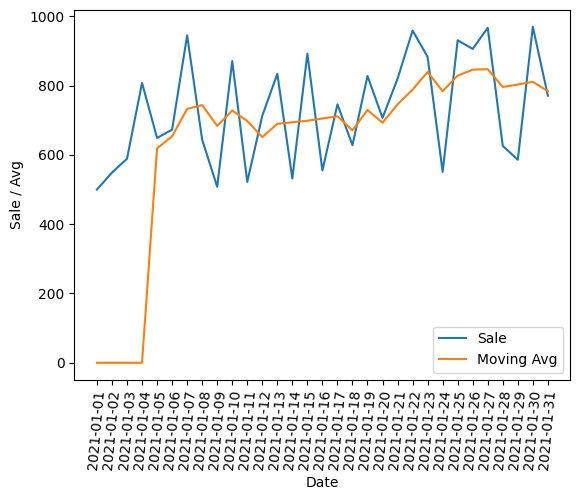

In [152]:
import matplotlib.pyplot as plt

plt.plot(df['Dates'],df['Sale'],label = 'Sale')
plt.xticks(df['Dates'],rotation=85)
plt.plot(df['Dates'],df['Moving Avg'],label = 'Moving Avg')
plt.xticks(df['Dates'],rotation=85)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sale / Avg')